<a href="https://colab.research.google.com/github/Elizabeth0311/CodeStates_Project/blob/main/AI_04__%EB%AC%B8%ED%98%9C%EB%A6%AC_section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sample Data/vgames2_update2.csv')
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46
2,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53
3,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14
4,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31
...,...,...,...,...,...,...,...,...,...
16592,Psychic Detective,PS,1995,Adventure,Electronic Arts,0.01,0.00,0.00,0.00
16593,You Don't Know Jack,PC,1995,Misc,Vivendi Games,0.01,0.00,0.00,0.00
16594,Mortal Kombat,PC,1994,Fighting,Acclaim Entertainment,0.01,0.00,0.00,0.00
16595,Empire Deluxe,PC,1992,Strategy,New World Computing,0.01,0.00,0.00,0.00


In [ ]:
df_year = df.drop(['Name','Platform','Publisher'], axis=1)
df_year['Sales_sum'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df_year

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
0,2004,Action,9.43,0.40,0.41,10.57,20.81
1,2006,Sports,41.49,29.02,3.77,8.46,82.74
2,2004,Racing,3.01,0.01,1.10,7.53,11.65
3,2013,Action,7.01,9.27,0.97,4.14,21.39
4,2008,Racing,15.85,12.88,3.79,3.31,35.83
...,...,...,...,...,...,...,...
16592,1995,Adventure,0.01,0.00,0.00,0.00,0.01
16593,1995,Misc,0.01,0.00,0.00,0.00,0.01
16594,1994,Fighting,0.01,0.00,0.00,0.00,0.01
16595,1992,Strategy,0.01,0.00,0.00,0.00,0.01


In [ ]:
df_pivot=df_year.pivot_table(values='Sales_sum', index='Year', columns='Genre', aggfunc='sum',fill_value=0)
# replace the Month with year 
df_pivot.rename(columns={"Year":"Genre"})
# drop first column
df_pivot.iloc[1:].reset_index(drop=True)
df_pivot['max'] = df_pivot.idxmax(axis= 1)
df_pivot


Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,max
Year,,,,,,,,,,,,,
1977,1.25,0.00,0.00,0.00,0.00,0.00,0.27,0.00,0.98,0.00,0.00,0.00,Action
1978,0.27,0.00,0.00,0.00,0.00,1.02,0.00,0.00,2.53,0.00,0.15,0.00,Shooter
1979,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Action
1980,1.24,1.30,0.77,2.70,0.00,0.00,0.32,0.00,7.07,0.00,0.52,0.00,Shooter
1981,14.79,0.00,0.00,0.00,6.92,2.25,0.48,0.00,10.02,0.44,0.78,0.00,Action
1982,6.50,0.00,0.00,0.87,5.03,10.04,1.57,0.00,3.81,0.00,1.06,0.00,Puzzle
1983,2.86,0.40,0.00,2.14,6.93,0.78,0.00,0.00,0.49,0.00,3.20,0.00,Platform
1984,1.85,0.00,0.47,1.45,0.72,3.14,5.95,0.00,31.10,0.00,6.17,0.00,Shooter
1985,3.52,0.00,1.05,0.00,43.17,3.21,0.00,0.00,1.00,0.04,1.96,0.00,Platform


In [ ]:
Eighty = df_pivot.loc['1980':'1989',:]
Eighty

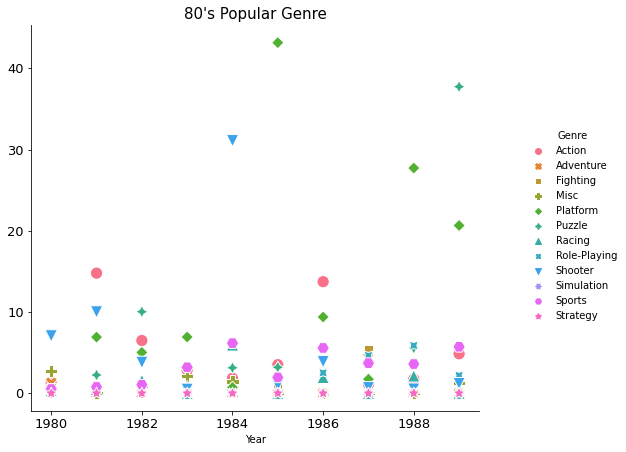

In [ ]:
p = sns.relplot(data = Eighty,kind="scatter",s=150)
plt.gcf().set_size_inches(9,6)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


plt.title("80's Popular Genre",fontsize=15)

plt.show()


In [ ]:
Ninety = df_pivot.loc['1990':'1999',:]
Ninety

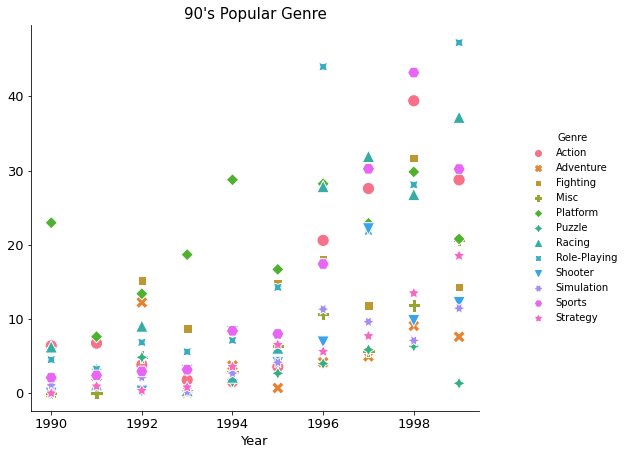

In [ ]:
p = sns.relplot(data = Ninety,kind="scatter",s=150)
plt.gcf().set_size_inches(9,6)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("90's Popular Genre",fontsize=15)
plt.show()

In [ ]:
two_1st = df_pivot.loc['2000':'2009',:]
two_1st

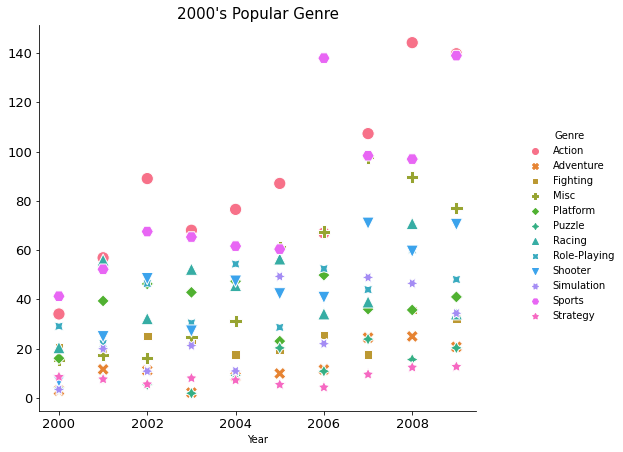

In [ ]:
p = sns.relplot(data = two_1st,kind="scatter",s=150)
plt.gcf().set_size_inches(9,6)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("2000's Popular Genre",fontsize=15)
plt.show()

In [ ]:
two_2nd = df_pivot.loc['2010':'2019',:]
two_2nd


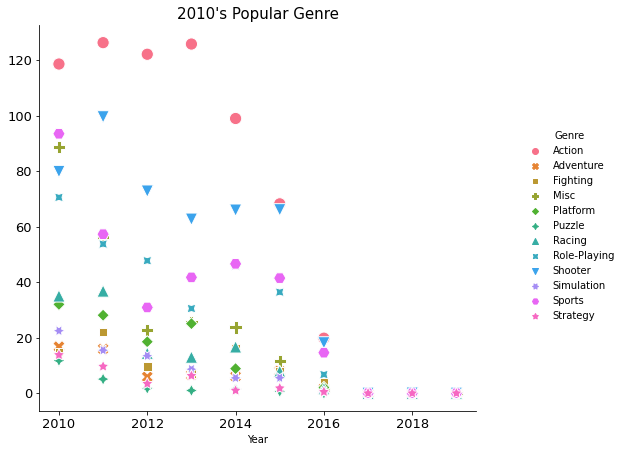

In [ ]:
p = sns.relplot(data = two_2nd,kind="scatter",s=150)
plt.gcf().set_size_inches(9,6)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("2010's Popular Genre",fontsize=15)
plt.show()

In [ ]:
national = df.drop(['Name','Platform','Year','Publisher'], axis=1)
national.set_index('Genre',drop=True, inplace=True)
national['prefer']= national.idxmax(axis=1)
national

In [ ]:
# 지역과 장르에 관한 데이터셋 
a= df.groupby('Genre')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()
a['prefer']= a.idxmax(axis=1)
a['sum'] = a.sum(axis=1)
a['interger']=a['sum'].round(0).astype(int)
a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,prefer,sum,interger
Genre,,,,,,,
Action,877.51,522.16,157.86,186.45,NA_Sales,1743.98,1744
Adventure,107.01,64.05,51.95,16.81,NA_Sales,239.82,240
Fighting,223.20,101.22,87.34,36.64,NA_Sales,448.40,448
Misc,408.05,212.36,105.27,74.04,NA_Sales,799.72,800
Platform,446.44,201.61,130.65,51.53,NA_Sales,830.23,830
Puzzle,123.35,50.73,56.87,12.52,NA_Sales,243.47,243
Racing,357.19,237.10,56.40,77.10,NA_Sales,727.79,728
Role-Playing,319.54,183.58,344.95,56.96,JP_Sales,905.03,905
Shooter,581.92,313.05,38.28,102.65,NA_Sales,1035.90,1036


In [ ]:
# 가설검정을 위한 타입변환 float->int 
a_int = a.iloc[:,0:5].round(0)
a_int = a_int.apply(pd.to_numeric, errors='coerce')
a_int

In [ ]:
# 지역과 선호하는 게임장르의 연관성을 보기 위한 카이스퀘어검정

# 귀무가설 : 지역에 따라 선호하는 게임 장르는 관련이 없다. 
# 대안가설 : 지역에 따라 선호하는 게임 장르는 관련이 있다. 
from scipy import stats
from scipy.stats import chi2_contingency
chi2 = chi2_contingency([[878,522,158], [107,64,52], [223,101,87], 
                         [408,212,105],[446,202,131],[123,51,57],
                         [357,237,56],[320,184,345],[582,313,38],
                         [183,113,64],[681,376,135],[69,45,49]])
chi2

# p-value 값 2.4944628866417448e-123 기각역 0.05보다 작으므로 귀무가설 기각 

In [ ]:
# 지역과 선호하는 게임장르에 관한 데이터셋 

fvr = df.groupby('Genre')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()
fvr = fvr.transpose()
fvr['prefer'] = fvr.idxmax(axis=1)
fvr_genre = fvr.transpose()
fvr_genre

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,877.51,522.16,157.86,186.45
Adventure,107.01,64.05,51.95,16.81
Fighting,223.2,101.22,87.34,36.64
Misc,408.05,212.36,105.27,74.04
Platform,446.44,201.61,130.65,51.53
Puzzle,123.35,50.73,56.87,12.52
Racing,357.19,237.1,56.4,77.1
Role-Playing,319.54,183.58,344.95,56.96
Shooter,581.92,313.05,38.28,102.65


In [ ]:
PF_group=df.groupby('Platform')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()
PF_group

In [ ]:
p_na = df.groupby('Platform')[['NA_Sales']].sum()
order_na =p_na.sort_values(by=['NA_Sales'] ,ascending=False)
order_na.head(10)

In [ ]:
p_eu = df.groupby('Platform')[['EU_Sales']].sum()
order_eu =p_eu.sort_values(by=['EU_Sales'] ,ascending=False)
order_eu.head(10)

In [ ]:
p_JP = df.groupby('Platform')[['JP_Sales']].sum()
order_JP =p_JP.sort_values(by=['JP_Sales'] ,ascending=False)
order_JP.head(10)

In [ ]:
p_Other = df.groupby('Platform')[['Other_Sales']].sum()
order_Other =p_Other.sort_values(by=['Other_Sales'] ,ascending=False)
order_Other.head(10)

In [ ]:
# 출고량 높은 게임에 대한 데이터셋 

high_NA=df.sort_values(by=['NA_Sales'],ascending=[False],ignore_index=True)
NA = high_NA[0:5]
NA

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77
2,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47
3,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58
4,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31


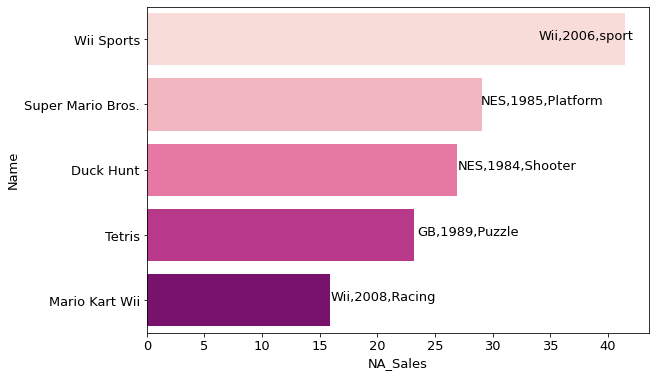

In [ ]:
plt.rcParams["axes.labelsize"] = 13
plt.figure(figsize=(9,6))
plt.text(34,0,'Wii,2006,sport',fontsize = 13)
plt.text(29,1,'NES,1985,Platform',fontsize = 13)
plt.text(27,2,'NES,1984,Shooter',fontsize = 13)
plt.text(23.5,3,'GB,1989,Puzzle',fontsize = 13)
plt.text(15.9,4,'Wii,2008,Racing',fontsize = 13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sequential_colors = sns.color_palette("RdPu", 5)

sns.barplot(data=NA, x = 'NA_Sales', y = 'Name', palette=sequential_colors)
plt.show()

In [ ]:
high_EU=df.sort_values(by=['EU_Sales'],ascending=False,ignore_index=True)
high_EU
EU= high_EU[0:5]
EU


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96
3,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75
4,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14


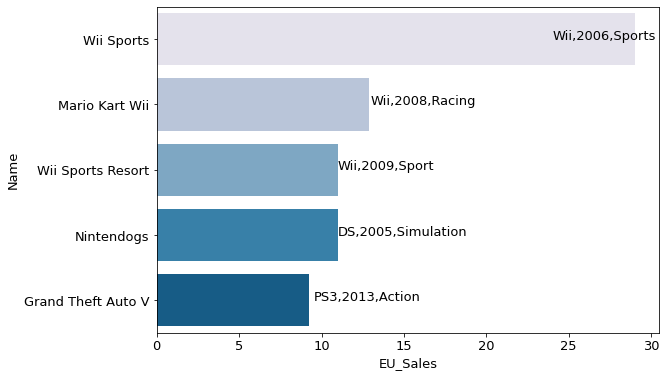

In [ ]:
plt.rcParams["axes.labelsize"] = 13
plt.figure(figsize=(9,6))
plt.text(24,0,'Wii,2006,Sports',fontsize = 13)
plt.text(13,1,'Wii,2008,Racing',fontsize = 13)
plt.text(11,2,'Wii,2009,Sport',fontsize = 13)
plt.text(11,3,'DS,2005,Simulation',fontsize = 13)
plt.text(9.5,4,'PS3,2013,Action',fontsize = 13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sequential_colors = sns.color_palette("PuBu", 5)
sns.barplot(data=EU, x = 'EU_Sales', y = 'Name', palette=sequential_colors)
plt.show()

In [ ]:
high_JP=df.sort_values(by=['JP_Sales'],ascending=False,ignore_index=True)
high_JP
JP= high_JP[0:5]
JP


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00
1,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90
4,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37


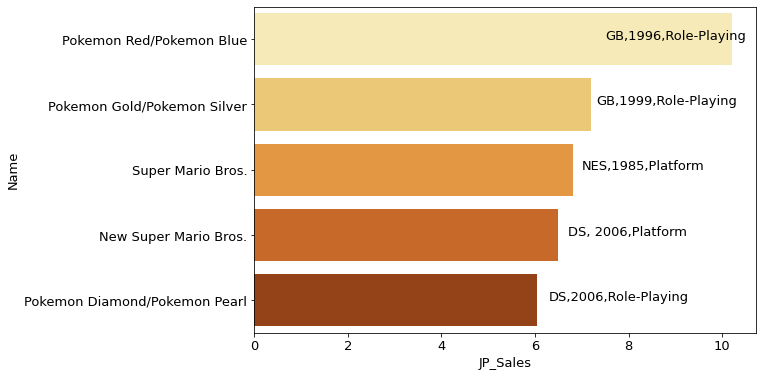

In [ ]:
plt.rcParams["axes.labelsize"] = 13
plt.figure(figsize=(9,6))
plt.text(7.5,0,'GB,1996,Role-Playing',fontsize = 13)
plt.text(7.3,1,'GB,1999,Role-Playing',fontsize = 13)
plt.text(7,2,'NES,1985,Platform',fontsize = 13)
plt.text(6.7,3,'DS, 2006,Platform',fontsize = 13)
plt.text(6.3,4,'DS,2006,Role-Playing',fontsize = 13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sequential_colors = sns.color_palette("YlOrBr", 5)
sns.barplot(data=JP, x = 'JP_Sales', y = 'Name', palette=sequential_colors)
plt.show()


In [ ]:
high_Other=df.sort_values(by=['Other_Sales'],ascending=False,ignore_index=True)
high_Other
Other= high_Other[0:5]
Other

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46
2,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53
3,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14
4,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31


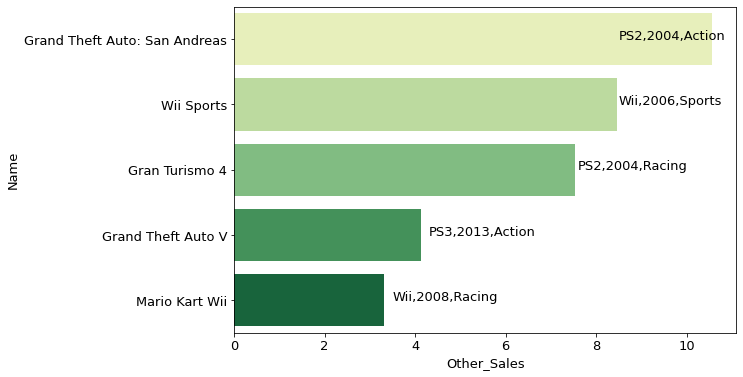

In [ ]:
plt.rcParams["axes.labelsize"] = 13
plt.figure(figsize=(9,6))
plt.text(8.5,0,'PS2,2004,Action',fontsize = 13)
plt.text(8.5,1,'Wii,2006,Sports',fontsize = 13)
plt.text(7.6,2,'PS2,2004,Racing',fontsize = 13)
plt.text(4.3,3,'PS3,2013,Action',fontsize = 13)
plt.text(3.5,4,'Wii,2008,Racing',fontsize = 13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sequential_colors = sns.color_palette("YlGn", 5)
sns.barplot(data=Other, x = 'Other_Sales', y = 'Name', palette=sequential_colors)
plt.show()